## Indicators of Heavy Traffic on I-94
This project focuses on analyzing a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

The goal of this analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There are **48,204** rows and **9** columns and null values do not exist. Each row describes traffic and weather data for a specific hour — we have data from **2012-10-02 09:00:00** until **2018-09-30 23:00:00**.

A station located approximately midway between Minneapolis and Saint Paul records the traffic data (as shown in the [documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)). For this station, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of the station. In other words, we should avoid generalizing our results for the entire I-94 highway.

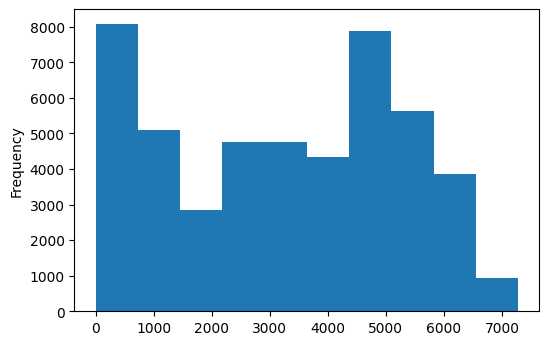

In [4]:
# Plotting a histogram to show the distribution of the traffic_volume column
i_94['traffic_volume'].plot.hist()

In [5]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

There were only 1,193 cars or fewer passing the station each hour at about 25% of the time. This most likely occurs during the night, or during a road construction. However, the traffic volume was four times as much (4,933 cars or more) about 75% of the time.

This observation gives us an interesting insight where we are comparing daytime data with nighttime data.

## Traffic Volume: Day vs. Night
We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 AM to 7 PM (12 hours)
* Nighttime data: hours from 7 PM to 7 AM (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [6]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])
day = i_94.copy()[(i_94['date_time'].dt.hour >=7) & (i_94['date_time'].dt.hour <19)]
print(day.shape)
night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour<7)]
print(night.shape)

(23877, 9)
(24327, 9)


The difference in the number of entries between day and night is due to a few hours of missing data. For instance, looking at rows 176 and 177 (i_94.iloc[176:178]), there's no data for two hours (4 and 5).

## Traffic Volume: Day vs. Night(II)
We are going to compare the traffic volume at night and during day.

Text(0, 0.5, 'Frequency')

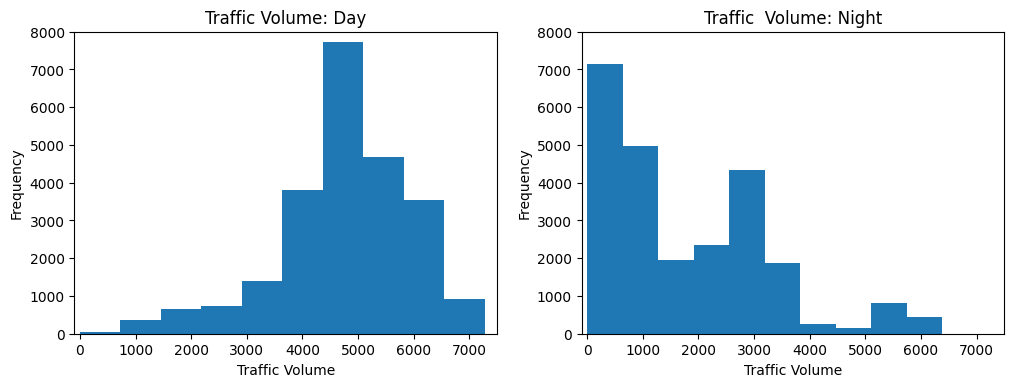

In [14]:
plt.figure(figsize=(12, 4))
#Plotting the traffic volume for day
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
#Plotting traffic volume for night
plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic  Volume: Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')


In [15]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [16]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the traffic volume is negatively skewed during the day. This means that there is high number of high traffic volume — there are more than 4,252 cars passing the station each hour 75% of the time (since 25% of values are less than 4,252).

The histogram displaying traffic volume during the night is positively skewed. This implies that there is low number of high trafficvolume — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Time Indicators
Time is possibly one of the possible indicators of heavy traffic. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

We're going to look at a few line plots showing how the traffic volume changes according to the following:

 * Month
 * Day of the week
 * Time of day

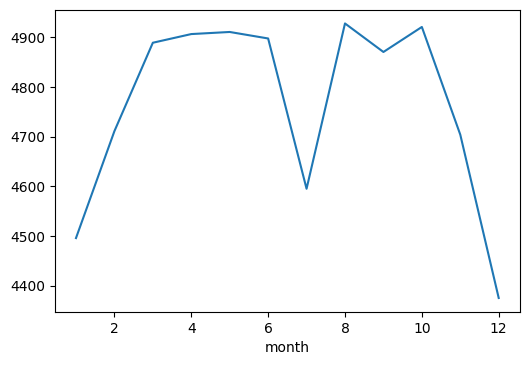

In [20]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

It is evident that traffic is high during the months of March to June, August, and October (warm months). Traffic is less during the months of February and November(cold months). The month of July is esceptional as it records the lowest traffic. 

We will check the change of traffic each year to see how traffic changed during the month of July.

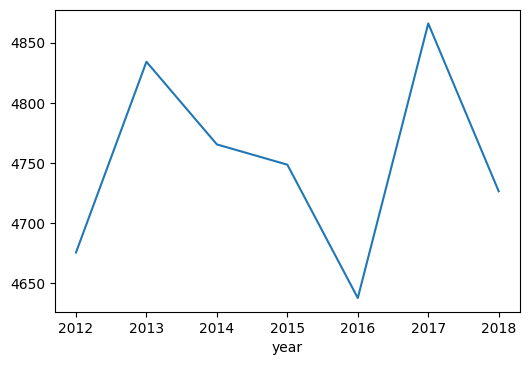

In [21]:
day['year'] = day['date_time'].dt.year
by_year = day.groupby('year').mean()
by_year['traffic_volume'].plot.line()

Traffic  is just as heavy as the other months with the exception of 2016 when traffic is extremely low. The possible reason for this could be as a result of road construction or maintanance.
We can tentatively conclude that the traffic is heavier duting the cold months compared to warm months.

## Time Indicators (II)
We are going to build line plots for another unit of time which is during the week.

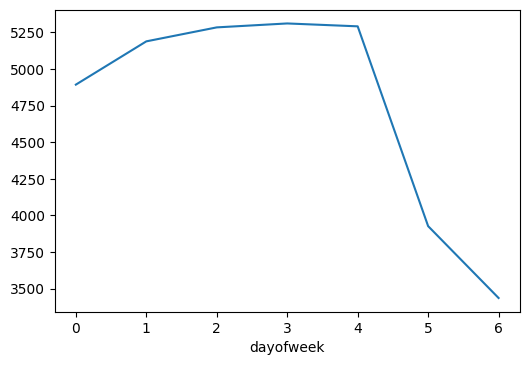

In [23]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show() # 0 is Monday, 6 is Sunday

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

## Time Indicators (III)
We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

Text(0.5, 1.0, 'Traffiv Volume by Day: Weekend')

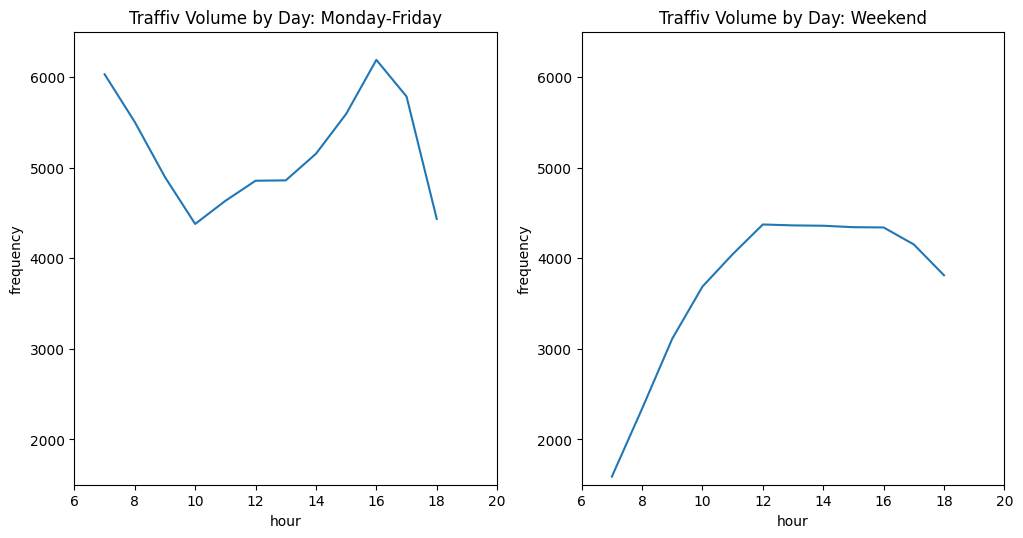

In [26]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(12,6))
#Plotting line plot for business days
plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.xlabel('hour')
plt.ylabel('frequency')
plt.title('Traffiv Volume by Day: Monday-Friday')
#Plotting line plot for weekends
plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.xlabel('hour')
plt.ylabel('frequency')
plt.title('Traffiv Volume by Day: Weekend')


At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. a see volumes of over 6,000 cars at rush hours.
In summary:

 * The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
 * The traffic is usually heavier on business days compared to weekends.
 * On business days, the rush hours are around 7 and 16.

## Weather Indicators
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.
A few of these columns are numerical so let's start by looking up their correlation values with `traffic_volume`.

In [27]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

There is a strong corrrelation bewteen `traffic_volume` and `temp` with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.

Let's generate a scatter plot to visualize the correlation between temp and traffic_volume.

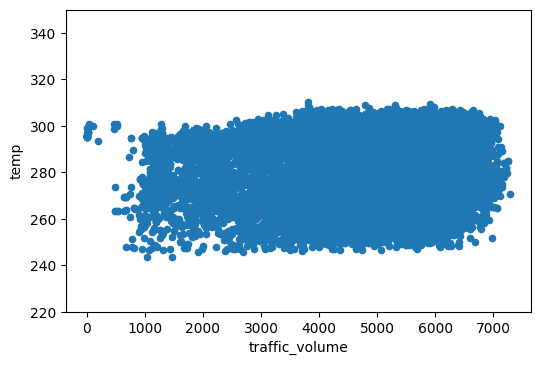

In [29]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(220, 350)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

We will look at the other weather-related columns to see if we can find more useful data: `weather_main` and `weather_description`. We will calculate the average traffic volume related with each unique value in the two columns.

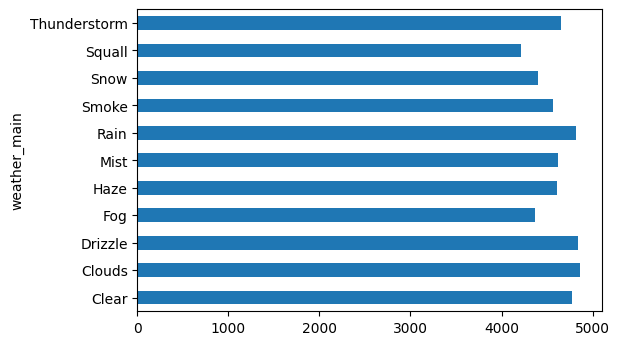

In [31]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

It seems that there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by `weather_description`, which has a more granular weather classification.

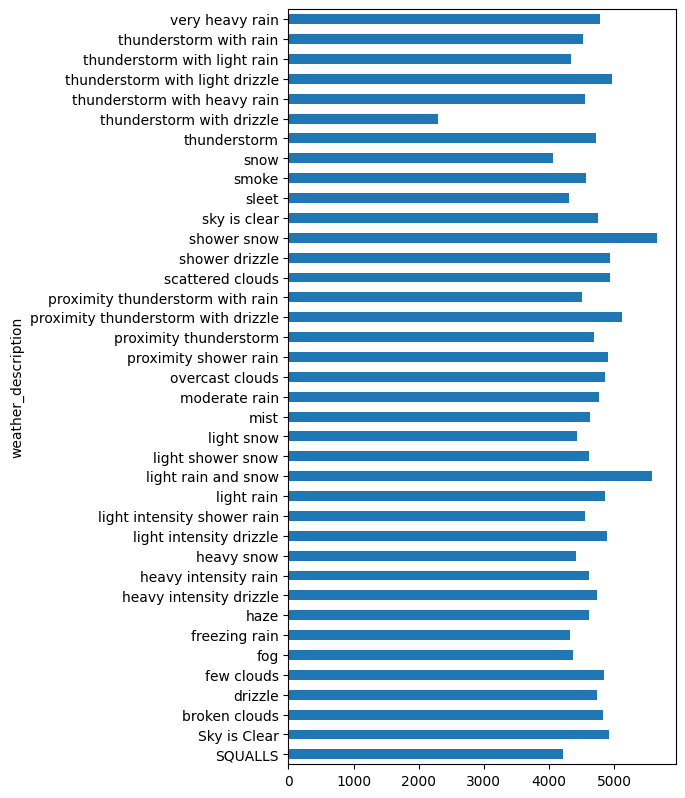

In [35]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

It seems that there are three weather types where traffic volume exceeds 5,000:

 * Shower snow
 * Light rain and snow
 * Proximity thunderstorm with drizzle

However, it is realy not clear why these weather types have the highest average traffic values. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

  **Time indicators**
  * The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
  * The traffic is usually heavier on business days compared to the weekends.
  * On business days, the rush hours are around 7 and 16.
   **Weather indicators**
  * Shower snow
  * Light rain and snow
  * Proximity thunderstorm with drizzle
